In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')  # Using 'liblinear' for binary classification
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class



In [3]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Default threshold evaluation (0.5)
default_predictions = (y_scores >= 0.5).astype(int)
default_accuracy = accuracy_score(y_test, default_predictions)

# Adjusted threshold evaluation
adjusted_predictions = (y_scores >= optimal_threshold).astype(int)
adjusted_accuracy = accuracy_score(y_test, adjusted_predictions)



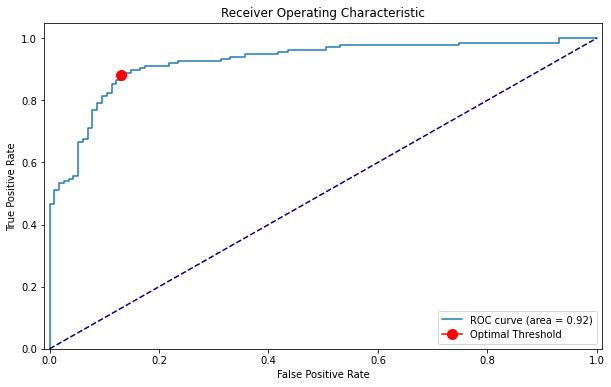

Default Threshold (0.5) Accuracy: 0.852
Optimal Threshold: 0.4090
Accuracy with Optimal Threshold: 0.876


In [4]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', markersize=10, color='red', label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.01])  
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print results
print(f"Default Threshold (0.5) Accuracy: {default_accuracy}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Accuracy with Optimal Threshold: {adjusted_accuracy}")


In [5]:
thresholds

array([1.99980909, 0.99980909, 0.93473453, 0.93289682, 0.90642724,
       0.90251575, 0.88934566, 0.88399842, 0.88007738, 0.87721963,
       0.87709422, 0.87651085, 0.86968104, 0.86962254, 0.74820065,
       0.74438827, 0.74432933, 0.7408773 , 0.68604124, 0.67611136,
       0.55821632, 0.54535472, 0.52238733, 0.52111449, 0.49335655,
       0.49230023, 0.49081371, 0.48678373, 0.47623223, 0.46663293,
       0.43529977, 0.41312538, 0.40900535, 0.40771274, 0.40509507,
       0.4043522 , 0.39561122, 0.35665381, 0.35408234, 0.3369371 ,
       0.33460679, 0.29060672, 0.28216332, 0.27187163, 0.24957014,
       0.21700849, 0.21580084, 0.21050967, 0.20504485, 0.18501869,
       0.17405239, 0.13928046, 0.13719947, 0.13593898, 0.12809364,
       0.11478955, 0.11060239, 0.10727065, 0.10347292, 0.05087753,
       0.04831275, 0.01377322, 0.00777647, 0.00301289])

In [6]:
y_scores

array([0.5794832 , 0.85876723, 0.49081371, 0.86794727, 0.94769285,
       0.06078263, 0.22168971, 0.81100592, 0.74438827, 0.3369371 ,
       0.94966654, 0.55821632, 0.00437614, 0.45542272, 0.7408773 ,
       0.18501869, 0.05959758, 0.94645934, 0.86968104, 0.48471455,
       0.99237068, 0.22135747, 0.05087753, 0.09168696, 0.963247  ,
       0.00685243, 0.99952387, 0.93289682, 0.0178007 , 0.966896  ,
       0.87651085, 0.98633834, 0.53783887, 0.16117619, 0.29060672,
       0.21700849, 0.06819356, 0.41312538, 0.05118299, 0.32672789,
       0.01762771, 0.94381156, 0.07329451, 0.47623223, 0.47742958,
       0.01145533, 0.9908637 , 0.00576811, 0.82833857, 0.98763461,
       0.08024129, 0.09391968, 0.01701154, 0.99571315, 0.9956113 ,
       0.67148975, 0.01808104, 0.10347292, 0.77637652, 0.17405239,
       0.70193833, 0.10111815, 0.09985227, 0.99941111, 0.99907018,
       0.0429905 , 0.98302079, 0.74432933, 0.70436077, 0.27187163,
       0.10985121, 0.48678373, 0.40771274, 0.14202816, 0.12676